#### 1. Mini Project: Song popularity predictor using Linear Regeression

### Problem Statement:
use machine learning to forecast how popular a song will become, analyzing various factors like audio features, metadata, and social media data to predict success

### Data Collection: 
Use the Kaggle Song popularity predicto which contains. Download if from Kaggle.

https://www.kaggle.com/datasets/samayashar/billboard-top-songs

In [101]:
import pandas as pd
import numpy as np

In [74]:
data = pd.read_csv(r"C:\Users\Dell\Desktop\hemavarshi\music_dataset.csv")

In [75]:
data

,Song,Artist,Streams,Daily Streams,Genre,Release Year,Peak Position,Weeks on Chart,Lyrics Sentiment,TikTok Virality,Danceability,Acousticness,Energy
0,Track 14728,EchoSync,689815326,796199,Trap,2021,81,8,0.20,17,0.11,0.59,0.60
1,Track 21319,The Midnight Howl,457954557,2426710,Electronic,2018,44,99,0.51,30,0.61,0.25,0.71
2,Track 22152,Retro Resonance,217316865,1639915,Reggae,1992,57,12,0.36,11,0.43,0.58,0.20
3,Track 80217,Urban Rhapsody,312747634,3614532,Pop,2000,21,50,0.89,44,0.18,0.04,0.63
4,Track 77204,Sofia Carter,726442597,1028518,Blues,2001,97,9,-0.62,71,0.82,0.59,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4845,Track 24875,Aurora Soundwave,439001503,391466,Indie,2003,59,18,0.61,54,0.66,0.54,0.73
4846,Track 7493,Samantha Lee,272411120,4270641,Metal,2004,96,1,0.10,94,0.77,0.50,0.19
4847,Track 61735,Retro Resonance,590393937,1474438,K-Pop,2014,55,27,-0.34,9,0.91,0.83,0.91
4848,Track 47314,Bass Surge,376858259,1933465,Latin,1996,75,15,0.41,31,0.17,0.03,0.79


In [76]:
data.head()

,Song,Artist,Streams,Daily Streams,Genre,Release Year,Peak Position,Weeks on Chart,Lyrics Sentiment,TikTok Virality,Danceability,Acousticness,Energy
0,Track 14728,EchoSync,689815326,796199,Trap,2021,81,8,0.20,17,0.11,0.59,0.60
1,Track 21319,The Midnight Howl,457954557,2426710,Electronic,2018,44,99,0.51,30,0.61,0.25,0.71
2,Track 22152,Retro Resonance,217316865,1639915,Reggae,1992,57,12,0.36,11,0.43,0.58,0.20
3,Track 80217,Urban Rhapsody,312747634,3614532,Pop,2000,21,50,0.89,44,0.18,0.04,0.63
4,Track 77204,Sofia Carter,726442597,1028518,Blues,2001,97,9,-0.62,71,0.82,0.59,0.61


In [77]:
data.tail()

,Song,Artist,Streams,Daily Streams,Genre,Release Year,Peak Position,Weeks on Chart,Lyrics Sentiment,TikTok Virality,Danceability,Acousticness,Energy
4845,Track 24875,Aurora Soundwave,439001503,391466,Indie,2003,59,18,0.61,54,0.66,0.54,0.73
4846,Track 7493,Samantha Lee,272411120,4270641,Metal,2004,96,1,0.10,94,0.77,0.50,0.19
4847,Track 61735,Retro Resonance,590393937,1474438,K-Pop,2014,55,27,-0.34,9,0.91,0.83,0.91
4848,Track 47314,Bass Surge,376858259,1933465,Latin,1996,75,15,0.41,31,0.17,0.03,0.79
4849,Track 30934,Shadow Beats,262207213,2419058,Blues,2006,15,57,0.37,86,0.51,0.73,0.49


In [78]:
data.describe()

,Streams,Daily Streams,Release Year,Peak Position,Weeks on Chart,Lyrics Sentiment,TikTok Virality,Danceability,Acousticness,Energy
count,4.850000e+03,4.850000e+03,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000
mean,3.970579e+08,2.493418e+06,2007.725773,51.425773,52.280000,0.000478,50.776495,0.555280,0.501029,0.553091
std,2.307764e+08,1.457542e+06,10.341312,28.909270,29.472456,0.574915,29.325179,0.260619,0.287531,0.260541
min,1.130883e+06,1.158000e+04,1990.000000,1.000000,1.000000,-1.000000,0.000000,0.100000,0.000000,0.100000
25%,1.982039e+08,1.209343e+06,1999.000000,27.000000,27.000000,-0.500000,26.000000,0.330000,0.250000,0.320000
50%,3.929179e+08,2.486103e+06,2008.000000,51.000000,52.000000,0.000000,51.000000,0.560000,0.500000,0.550000
75%,5.978880e+08,3.781338e+06,2017.000000,76.000000,78.000000,0.490000,76.000000,0.780000,0.750000,0.770000
max,7.999510e+08,4.999643e+06,2025.000000,100.000000,103.000000,1.000000,100.000000,1.000000,1.000000,1.000000


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850 entries, 0 to 4849
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song              4850 non-null   object 
 1   Artist            4850 non-null   object 
 2   Streams           4850 non-null   int64  
 3   Daily Streams     4850 non-null   int64  
 4   Genre             4850 non-null   object 
 5   Release Year      4850 non-null   int64  
 6   Peak Position     4850 non-null   int64  
 7   Weeks on Chart    4850 non-null   int64  
 8   Lyrics Sentiment  4850 non-null   float64
 9   TikTok Virality   4850 non-null   int64  
 10  Danceability      4850 non-null   float64
 11  Acousticness      4850 non-null   float64
 12  Energy            4850 non-null   float64
dtypes: float64(4), int64(6), object(3)
memory usage: 492.7+ KB


In [80]:
data.isnull()

,Song,Artist,Streams,Daily Streams,Genre,Release Year,Peak Position,Weeks on Chart,Lyrics Sentiment,TikTok Virality,Danceability,Acousticness,Energy
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4845,False,False,False,False,False,False,False,False,False,False,False,False,False
4846,False,False,False,False,False,False,False,False,False,False,False,False,False
4847,False,False,False,False,False,False,False,False,False,False,False,False,False
4848,False,False,False,False,False,False,False,False,False,False,False,False,False


In [81]:
data.isnull().sum()

Song                0
Artist              0
Streams             0
Daily Streams       0
Genre               0
Release Year        0
Peak Position       0
Weeks on Chart      0
Lyrics Sentiment    0
TikTok Virality     0
Danceability        0
Acousticness        0
Energy              0
dtype: int64

In [82]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4845    False
4846    False
4847    False
4848    False
4849    False
Length: 4850, dtype: bool

In [83]:
data.duplicated().sum()

0

In [84]:
data.ndim

2

In [85]:
data.columns

Index(['Song', 'Artist', 'Streams', 'Daily Streams', 'Genre', 'Release Year',
       'Peak Position', 'Weeks on Chart', 'Lyrics Sentiment',
       'TikTok Virality', 'Danceability', 'Acousticness', 'Energy'],
      dtype='object')

In [86]:
data["Artist"].unique()

array(['EchoSync', 'The Midnight Howl', 'Retro Resonance',
       'Urban Rhapsody', 'Sofia Carter', 'ElectroPulse',
       'Firefly Symphony', 'Samantha Lee', 'Neon Vortex', 'Liam Harper',
       'Jay Zenith', 'Shadow Beats', 'Bass Surge', 'Aurora Soundwave',
       'DJ Thunder', 'Horizon Flow', 'Ava & The Ocean', 'Crimson Echo',
       'Celestial Harmony', 'Luna Nova'], dtype=object)

In [87]:
data["Artist"].str.lower()

0                echosync
1       the midnight howl
2         retro resonance
3          urban rhapsody
4            sofia carter
              ...        
4845     aurora soundwave
4846         samantha lee
4847      retro resonance
4848           bass surge
4849         shadow beats
Name: Artist, Length: 4850, dtype: object

In [88]:
data["Artist"].str.upper()

0                ECHOSYNC
1       THE MIDNIGHT HOWL
2         RETRO RESONANCE
3          URBAN RHAPSODY
4            SOFIA CARTER
              ...        
4845     AURORA SOUNDWAVE
4846         SAMANTHA LEE
4847      RETRO RESONANCE
4848           BASS SURGE
4849         SHADOW BEATS
Name: Artist, Length: 4850, dtype: object

In [89]:
data["Artist"].str.strip()

0                EchoSync
1       The Midnight Howl
2         Retro Resonance
3          Urban Rhapsody
4            Sofia Carter
              ...        
4845     Aurora Soundwave
4846         Samantha Lee
4847      Retro Resonance
4848           Bass Surge
4849         Shadow Beats
Name: Artist, Length: 4850, dtype: object

#### Matplotlib Visualization

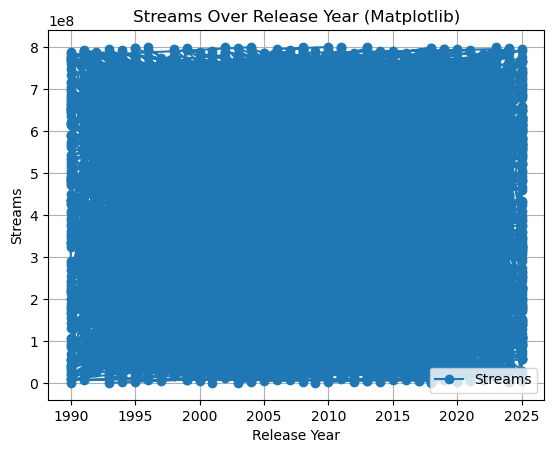

In [90]:
import matplotlib.pyplot as plt

plt.plot(data['Release Year'], data['Streams'], marker='o', label='Streams')
plt.xlabel('Release Year')
plt.ylabel('Streams')
plt.title('Streams Over Release Year (Matplotlib)')
plt.legend()
plt.grid()
plt.show()

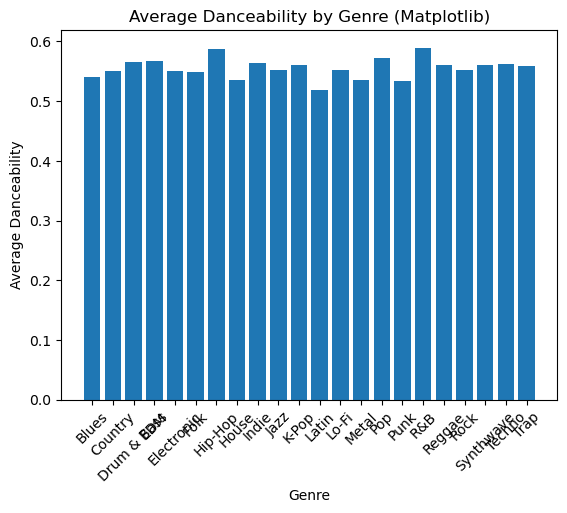

In [91]:
avg_danceability = data.groupby('Genre')['Danceability'].mean()
plt.bar(avg_danceability.index, avg_danceability)
plt.xlabel('Genre')
plt.ylabel('Average Danceability')
plt.title('Average Danceability by Genre (Matplotlib)')
plt.xticks(rotation=45)
plt.show()

#### Seaborn Visualization

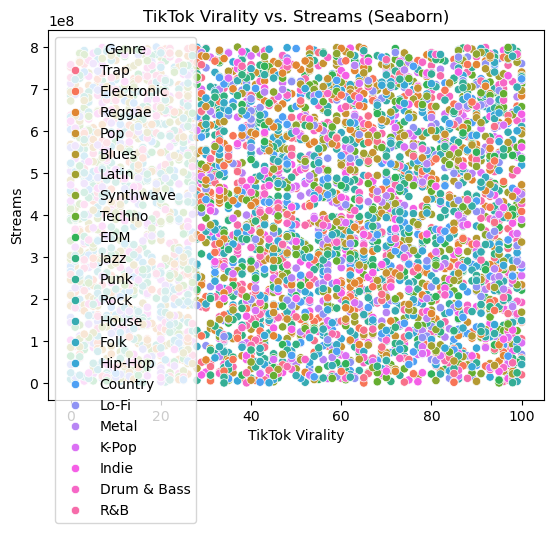

In [92]:
import seaborn as sns

sns.scatterplot(x='TikTok Virality', y='Streams', hue='Genre', data=data)
plt.title('TikTok Virality vs. Streams (Seaborn)')
plt.show()

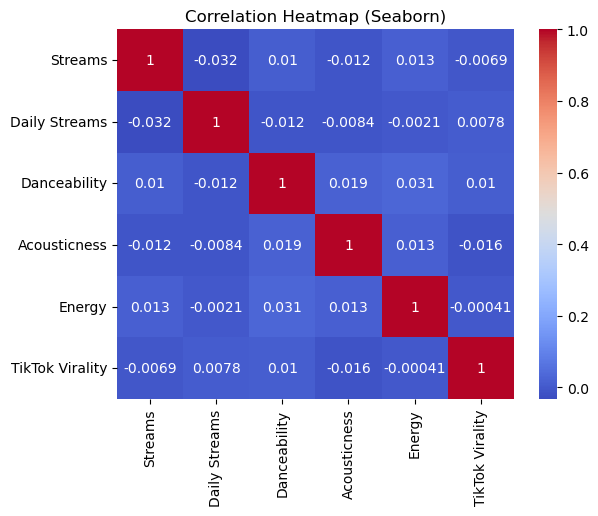

In [93]:
correlation_matrix = data[['Streams', 'Daily Streams', 'Danceability', 
                           'Acousticness', 'Energy', 'TikTok Virality']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Seaborn)')
plt.show()

#### Plotly Visualization

In [94]:
import plotly.express as px

fig = px.bar(data, x='Genre', y='Peak Position', color='Genre',
             title='Peak Position by Genre (Plotly)', barmode='group')
fig.show()

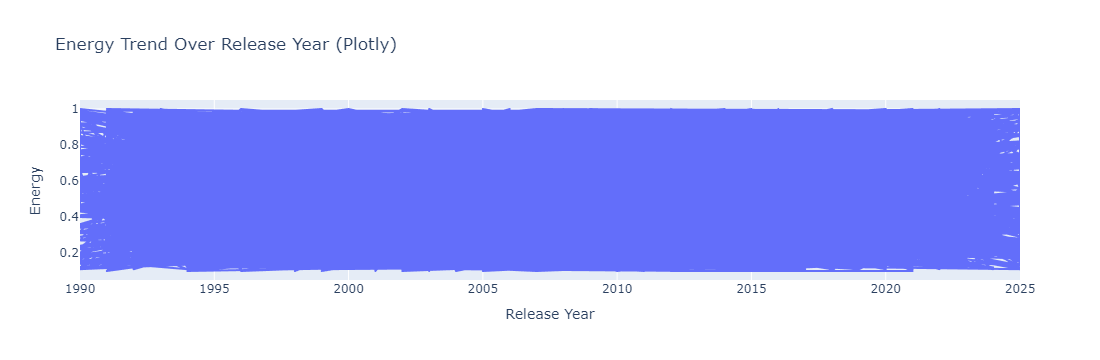

In [95]:
fig = px.line(data, x='Release Year', y='Energy', title='Energy Trend Over Release Year (Plotly)')
fig.show()

 #### Linear Regression Analysis

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [97]:
X = data[['TikTok Virality', 'Danceability']] 
y = data['Streams'] 

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Mean Squared Error: 5.277062606438836e+16
R-squared Score: -0.0038384432910949506
Model Coefficients: [   44669.98913143 11560046.24769011]
Model Intercept: 390844474.43042284


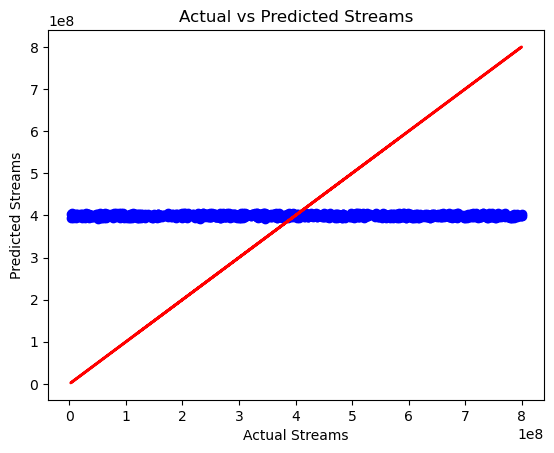

In [100]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)  
plt.title('Actual vs Predicted Streams')
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.show()